In [1]:
import os
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from natsort import natsort
from PIL import Image

In [2]:
img_dir = './image'
file_list = os.listdir(img_dir)
print(file_list)

['1_apple.png', '2_apple.png', '3_apple.png', '5_apple.png', '6_apple.png', '9_apple.png']


In [3]:
sorted_list = sorted(file_list)
print(sorted_list)

['1_apple.png', '2_apple.png', '3_apple.png', '5_apple.png', '6_apple.png', '9_apple.png']


In [4]:
file_list_temp01 = natsort.natsorted(os.listdir(img_dir))
print(file_list_temp01)

['1_apple.png', '2_apple.png', '3_apple.png', '5_apple.png', '6_apple.png', '9_apple.png']


In [5]:
file_list_temp = natsort.natsorted(glob.glob(os.path.join(img_dir, '*.png')))
print(file_list_temp)

['./image\\1_apple.png', './image\\2_apple.png', './image\\3_apple.png', './image\\5_apple.png', './image\\6_apple.png', './image\\9_apple.png']


400 400
(400, 400)


C:\Users\Jay\AppData\Local\Temp\ipykernel_10360\2585467147.py:34: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((new_size[0], new_size[1]), Image.ANTIALIAS)


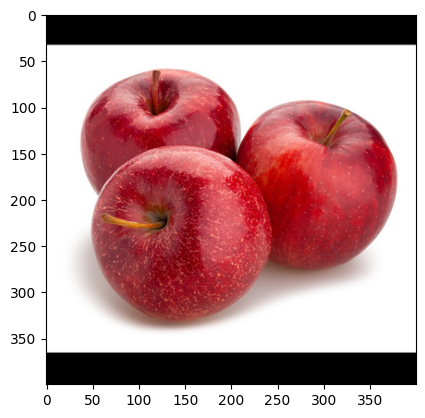

400 400
(400, 400)


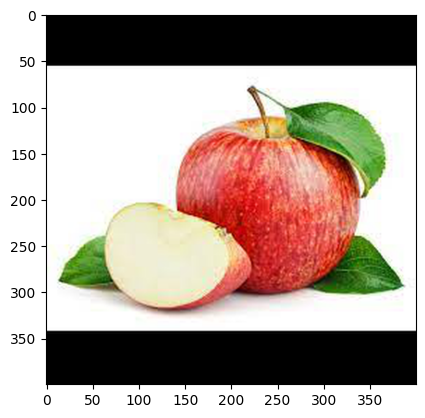

400 400
(400, 400)


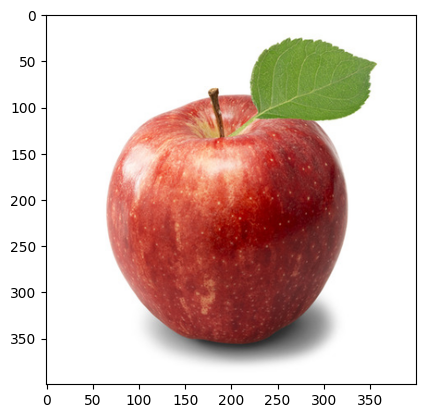

400 400
(400, 400)


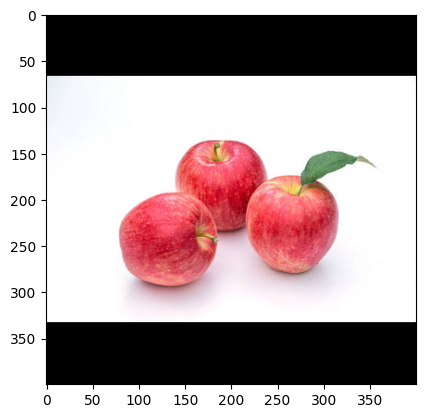

400 400
(400, 400)


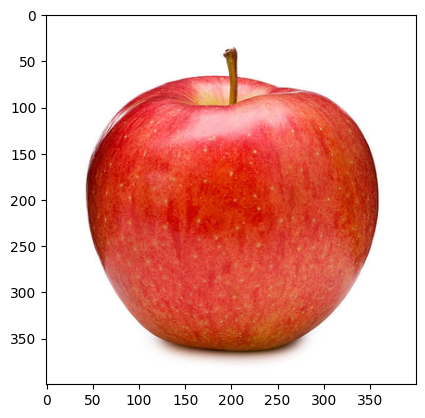

400 400
(400, 400)


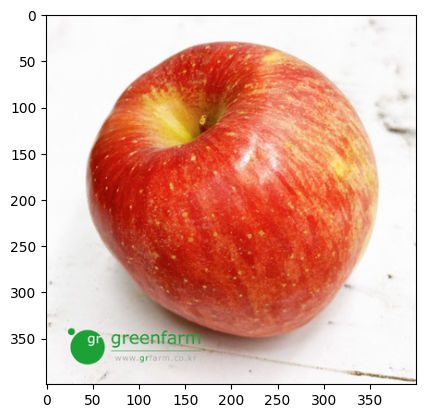

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def get_img_path(root_path) :
    file_paths = []
    for (path, dir, files) in os.walk(root_path) :
        for file in files :
            ext = os.path.splitext(file)[-1].lower()
            formats_list = ['.bmp', '.jpg', '.jpeg', '.png', '.tif', '.gif', '.dng', '.tiff']
            if ext in formats_list : 
                file_path = os.path.join(path, file)
                file_paths.append(file_path)
    return file_paths
            
def expend2square(pil_img, background_color) : 
    width, height = pil_img.size
    print(width,height)
    if width == height :
        return pil_img 
    
    elif width > height : 
        result = Image.new(pil_img.mode, (width,width), background_color)
        result.paste(pil_img, (0, (width - height) // 2))
        return result
    else :
        result = Image.new(pil_img.mode, (height,height), background_color)
        result.paste(pil_img, (0, (width - height) // 2, 0))
        return result
    
def resize_with_padding(pil_img, new_size, background_color) :
    img = expend2square(pil_img, background_color)
    img = img.resize((new_size[0], new_size[1]), Image.ANTIALIAS)
    return img

img_dir = './image/'
file_paths = get_img_path(img_dir)
for file in file_paths :
    img = Image.open(file)
    img_new = resize_with_padding(img, (400,400), (0,0,0))
    print(img_new.size)                     
    img_new.save(file)
    plt.imshow(img_new)
    plt.show()

In [7]:
import os
import cv2
import numpy as np
from PIL import Image

original_path = './image/'
resized_path = './resized_image/'
os.makedirs(resized_path, exist_ok=True)

file_list = os.listdir(original_path)
img_list = []

for item in file_list :
    img_list.append(item)

total_image = len(img_list)
index = 1
total_image
for name in img_list :
    img = Image.open('%s%s'%(original_path, name))
    img_array = np.array(img)
    img_resize = cv2.resize(img_array, (224,224), interpolation=cv2.INTER_AREA)
    img = Image.fromarray(img_resize)
    img.save('%s%s'%(resized_path, name))

    print(name + '   ' + str(index) + '/' + str(total_image))
    index += 1
print("Conversion completed")

1_apple.png   1/6
2_apple.png   2/6
3_apple.png   3/6
5_apple.png   4/6
6_apple.png   5/6
9_apple.png   6/6
Conversion completed


1. file_name : 01.jpg
width, height : (640,480)
image_path : ./data/01.jpg
(480, 640, 3)
bbox 좌표 확인 ; (468,92,171,248)
2
dog
bbox 좌표 확인 ; (3,183,200,214)
1
cat


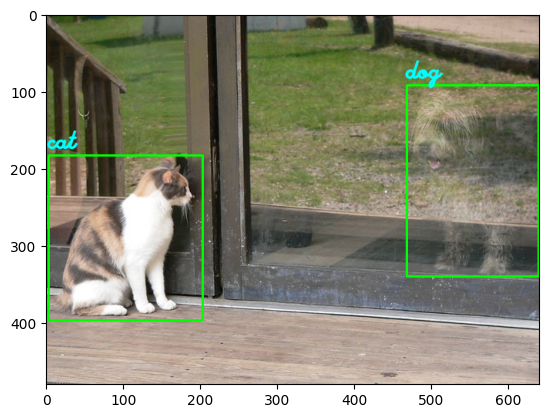

In [8]:
import json
import os

json_data_path = './data/instances_default.json'

with open(json_data_path, 'r', encoding='utf-8') as j : 
    json_data = json.load(j)

categories_info = json_data['categories']
images_info = json_data['images']
annotations_info = json_data['annotations']

label_dict = {1 : 'cat', 2 : 'dog'}

for image_json in images_info : 
    file_name = image_json['file_name']
    image_width = image_json['width']
    image_height = image_json['height']
    image_id = image_json['id']
    print(f"{image_id}. file_name : {file_name}")
    print(f"width, height : ({image_width},{image_height})")
    image_path = os.path.join("./data/", file_name)
    print(f"image_path : {image_path}")
    
    image = cv2.imread(image_path)
    print(image.shape)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    for anno_json in annotations_info :
        if image_id == anno_json['image_id'] :
            bbox = anno_json['bbox']
            x = int(bbox[0])
            y = int(bbox[1])
            w = int(bbox[2])
            h = int(bbox[3])
            print(f"bbox 좌표 확인 ; ({x},{y},{w},{h})")
        
            cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 2
            category_id = anno_json['category_id']
            print(category_id)
            label_name = label_dict[category_id]
            print(label_name)
            image = cv2.putText(image, label_name, (x, y-10), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,1, (0,255,255), 2, cv2.LINE_AA)
            
    plt.imshow(image)
    plt.show()

640 480
이미지 이름 : 01.jpg
이미지 경로 : ./data/01.jpg
dog
좌표 : (468, 92, 640, 340)
cat
좌표 : (3, 183, 204, 397)


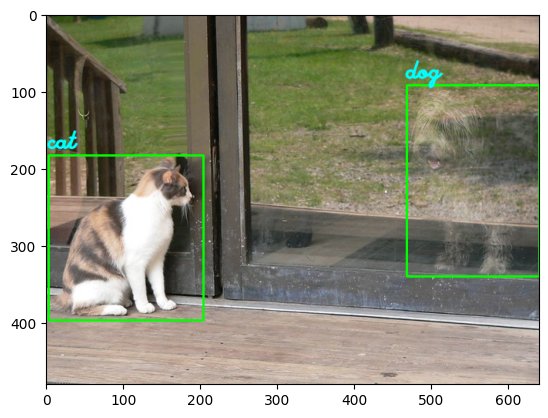

In [9]:
import os
import cv2
import matplotlib.pyplot as plt
from xml.etree.ElementTree import parse

def xml_read(xml_path) : 
    root = parse(xml_path).getroot()
    image_info = root.findall('image')
    for image in image_info :
        bbox = image.findall('box')
        image_width = image.attrib['width']
        image_height= image.attrib['height']
        print(image_width, image_height)
        
        image_name = image.attrib['name']
        print(f"이미지 이름 : {image_name}")
        image_path = os.path.join('./data/', image_name)
        print(f"이미지 경로 : {image_path}")
        
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        for box_info in bbox :
            label = box_info.attrib['label']
            print(label)
            xtl = box_info.attrib['xtl']
            ytl = box_info.attrib['ytl']
            xbr = box_info.attrib['xbr']
            ybr = box_info.attrib['ybr']
            
            xtl = int(float(xtl))
            ytl = int(float(ytl))
            xbr = int(float(xbr))
            ybr = int(float(ybr))
            print(f"좌표 : ({xtl}, {ytl}, {xbr}, {ybr})")
            
            image = cv2.rectangle(image, (xtl,ytl), (xbr,ybr), (0,255,0), 2)
            image = cv2.putText(image, label, (xtl,ytl-10), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1, (0,255,255), 2, cv2.LINE_AA)
    plt.imshow(image)
    plt.show()
xml_file = './data/annotations.xml'
xml_read(xml_file)

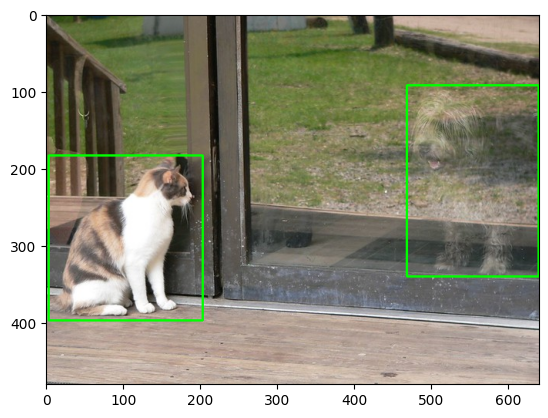

In [10]:
import json
import os 
import cv2
import matplotlib.pyplot as plt

json_path = './data/instances_default.json'
with open(json_path, 'r', encoding='utf-8') as f :
    json_data = json.load(f)
    
categories_info = json_data['categories']
images_info = json_data['images']
annotations_info = json_data['annotations']

label_dict = {1 : 0, 2 : 1}
for image_json in images_info :
    image_id = image_json['id']
    image_name = image_json['file_name']
    image_width = image_json['width']
    image_height = image_json['height']
    image_path = os.path.join('./data/', image_name)
    
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    for anno_json in annotations_info :
        if image_id == anno_json['image_id'] :
            bbox = anno_json['bbox']
            
            x = int(bbox[0])
            y = int(bbox[1])
            w = int(bbox[2])
            h = int(bbox[3])
            
            category_id = anno_json['category_id']
            label_number = label_dict[category_id]
            
            center_x = ((2 * x + w) / (2 * image_width))
            center_y = ((2 * y + h) / (2 * image_height))
            yolo_w = w / image_width
            yolo_h = h / image_height
            
            file_name_temp = image_name.replace(".jpg", "")
            cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 2)
            
        with open(f"{file_name_temp}.txt", 'a') as f :
            f.write(f"{label_number} {center_x} {center_y} {yolo_w} {yolo_h}\n")
            
plt.imshow(image)
plt.show()